In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
from src.models import eval_model as evm
from src.models import eval_baseline as evb
from sklearn.utils import resample
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score , cross_validate 
%load_ext autoreload
%autoreload 2

# Case for Downsample

In [2]:
from sklearn.model_selection import train_test_split
def read_and_split_data(file):
    df = pd.read_csv(file)
    x=df.drop(['TARGET_5Yrs','TARGET_5Yrs_Inv'],axis=1)
    y=df['TARGET_5Yrs_Inv']
    x_data , x_test ,y_data,  y_test = train_test_split(x, y, test_size=0.2, random_state = 8, stratify=y)
    x_train , x_val , y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state = 8, stratify=y_data)
    print('y',y.value_counts())
    print('y_train',y_train.value_counts())
    print('y_val', y_val.value_counts())
    print('y_test',y_test.value_counts())
    return x_train , x_val , y_train, y_val, x_test,  y_test

In [3]:
x_train , x_val , y_train, y_val, x_test,  y_test = read_and_split_data("../data/processed/df_cleaned_downsampled_nba_prediction.csv")

y 0    1331
1    1331
Name: TARGET_5Yrs_Inv, dtype: int64
y_train 0    852
1    851
Name: TARGET_5Yrs_Inv, dtype: int64
y_val 0    213
1    213
Name: TARGET_5Yrs_Inv, dtype: int64
y_test 1    267
0    266
Name: TARGET_5Yrs_Inv, dtype: int64


Accuracy Score:  0.5002935995302408  F1 Score  0.0  Precision Score  0.0  Recall Score  0.0 (BASELINE)


c:\users\xauspi\.virtualenvs\kaggle_assignment-dq2gjalz\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


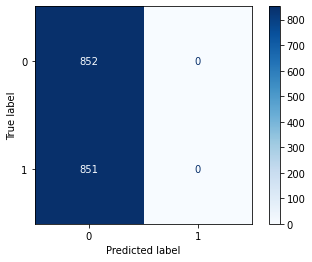

In [4]:
evb.eval_baseline(x_train,y_train)

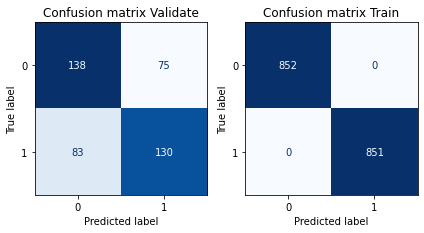

RandomForestClassifier(random_state=8)


(RandomForestClassifier(random_state=8), 1.0, 0.7018669135312658)

In [5]:
evm.eval_model(RandomForestClassifier(random_state=8),x_train,y_train,x_val,y_val)

In [6]:
rf_data = [
    ['n_estimators', 5], 
    ['n_estimators', 25],
    ['n_estimators',50],
    ['n_estimators', 150],
    ['n_estimators',250],
    ['n_estimators',350],
    ['max_depth',2],
    ['max_depth',6],
    ['max_depth',12],
    ['max_depth',25],
    ['max_depth',50],
    ['min_samples_leaf',1],
    ['min_samples_leaf',2],
    ['min_samples_leaf',3],
    ['min_samples_leaf',5],
    ['min_samples_leaf',10],
    ['min_samples_leaf',15],
    ['min_samples_leaf',50],
    ['max_features',2],
    ['max_features',5],
    ['max_features',10],
    ['max_features',15]
    
]
rf_param = pd.DataFrame(rf_data, columns = ['param', 'value']) 
rf_param

,param,value
0,n_estimators,5
1,n_estimators,25
2,n_estimators,50
3,n_estimators,150
4,n_estimators,250
5,n_estimators,350
6,max_depth,2
7,max_depth,6
8,max_depth,12
9,max_depth,25


# Training is overfitting. Tunning parameter starting with n_estimators

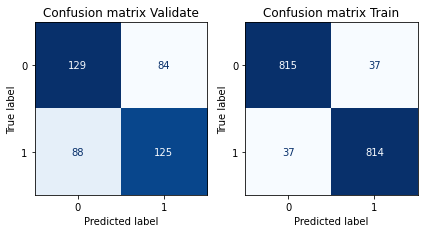

RandomForestClassifier(n_estimators=5, random_state=8)


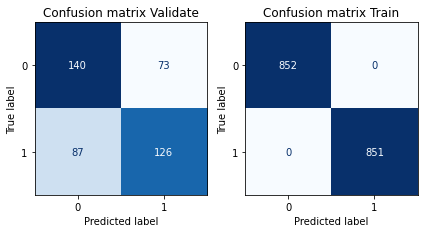

RandomForestClassifier(n_estimators=25, random_state=8)


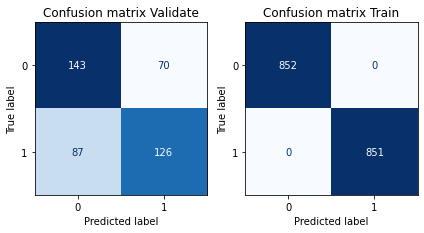

RandomForestClassifier(n_estimators=50, random_state=8)


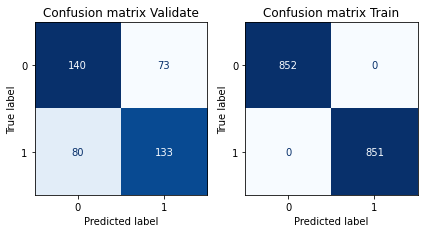

RandomForestClassifier(n_estimators=150, random_state=8)


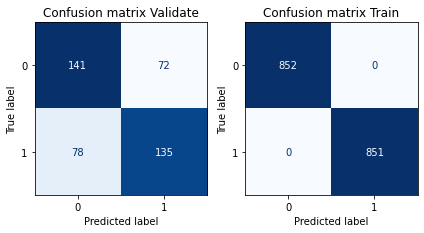

RandomForestClassifier(n_estimators=250, random_state=8)


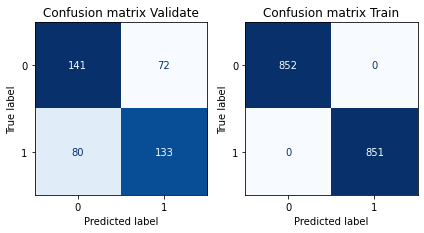

RandomForestClassifier(n_estimators=350, random_state=8)


In [7]:
for _,row in rf_param[rf_param['param']=='n_estimators'].iterrows():
    evm.eval_model(RandomForestClassifier(random_state=8,n_estimators = int(row.value)) ,x_train,y_train,x_val,y_val)

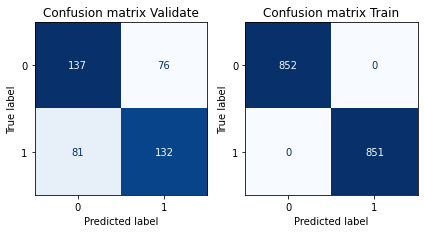

RandomForestClassifier(n_estimators=500, random_state=8)


(RandomForestClassifier(n_estimators=500, random_state=8),
 1.0,
 0.7109810663669026)

In [8]:
evm.eval_model(RandomForestClassifier(random_state=8,n_estimators = 500) ,x_train,y_train,x_val,y_val)

# Taking n_estimators = 250, tunning max_depth

In [11]:
nestimator = 250

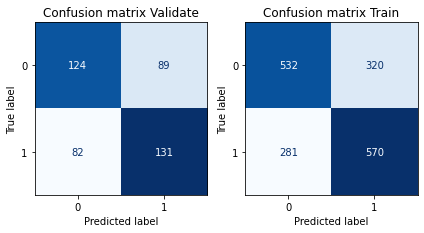

RandomForestClassifier(max_depth=2, n_estimators=250, random_state=8)


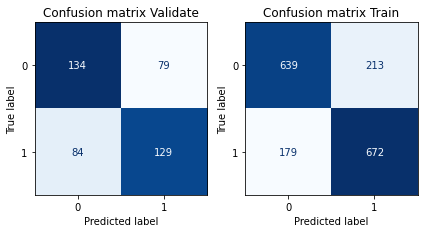

RandomForestClassifier(max_depth=6, n_estimators=250, random_state=8)


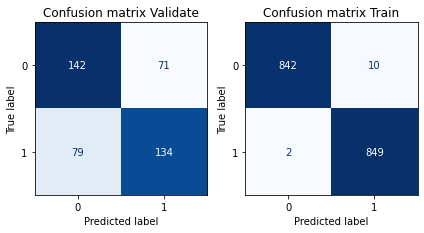

RandomForestClassifier(max_depth=12, n_estimators=250, random_state=8)


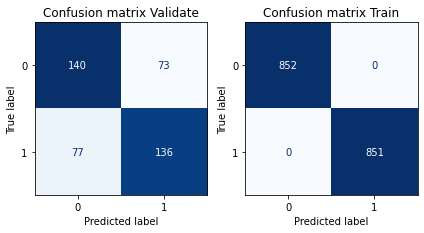

RandomForestClassifier(max_depth=25, n_estimators=250, random_state=8)


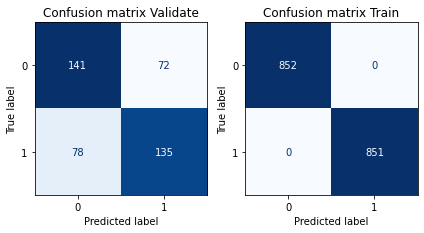

RandomForestClassifier(max_depth=50, n_estimators=250, random_state=8)


In [12]:
for _,row in rf_param[rf_param['param']=='max_depth'].iterrows():
    evm.eval_model(RandomForestClassifier(random_state=8,n_estimators = nestimator, max_depth= int(row.value)) ,x_train,y_train,x_val,y_val)

# Taking max_depth = 12, tunning min_samples_leaf

In [13]:
maxdepth = 12

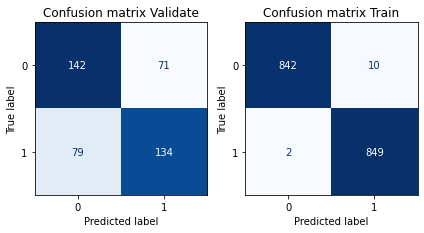

RandomForestClassifier(max_depth=12, n_estimators=250, random_state=8)


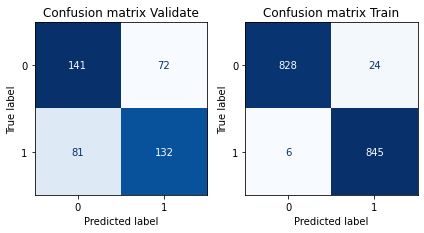

RandomForestClassifier(max_depth=12, min_samples_leaf=2, n_estimators=250,
                       random_state=8)


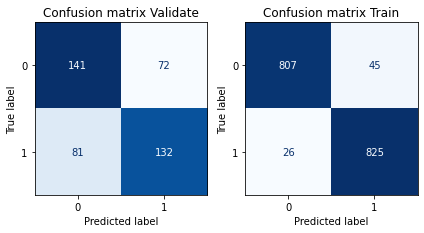

RandomForestClassifier(max_depth=12, min_samples_leaf=3, n_estimators=250,
                       random_state=8)


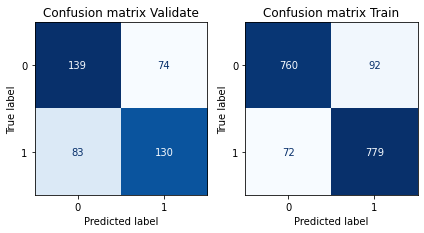

RandomForestClassifier(max_depth=12, min_samples_leaf=5, n_estimators=250,
                       random_state=8)


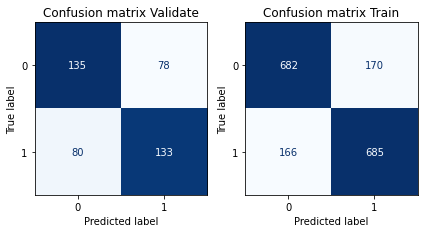

RandomForestClassifier(max_depth=12, min_samples_leaf=10, n_estimators=250,
                       random_state=8)


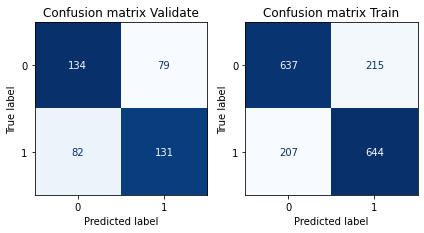

RandomForestClassifier(max_depth=12, min_samples_leaf=15, n_estimators=250,
                       random_state=8)


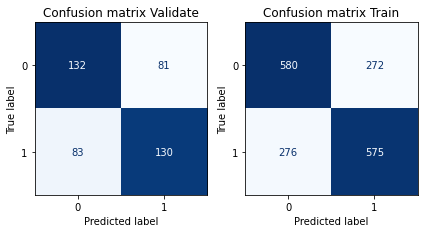

RandomForestClassifier(max_depth=12, min_samples_leaf=50, n_estimators=250,
                       random_state=8)


In [14]:
for _,row in rf_param[rf_param['param']=='min_samples_leaf'].iterrows():
    evm.eval_model(RandomForestClassifier(random_state=8,n_estimators =nestimator, max_depth=maxdepth,min_samples_leaf = int(row.value)) ,x_train,y_train,x_val,y_val)

# Taking min_samples_leaf = 1, Tunning max_features

In [15]:
minsamplesleaf=1

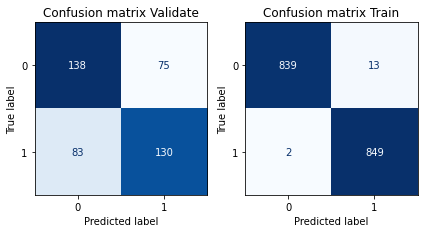

RandomForestClassifier(max_depth=12, max_features=2, n_estimators=250,
                       random_state=8)


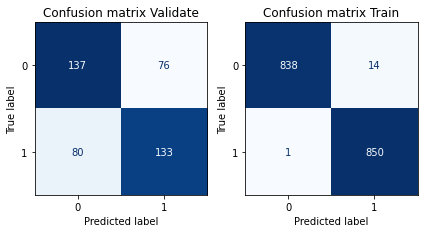

RandomForestClassifier(max_depth=12, max_features=5, n_estimators=250,
                       random_state=8)


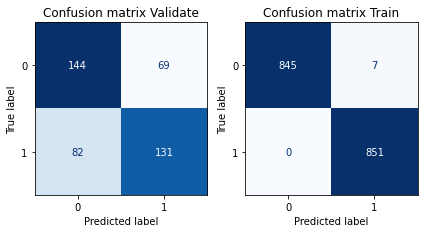

RandomForestClassifier(max_depth=12, max_features=10, n_estimators=250,
                       random_state=8)


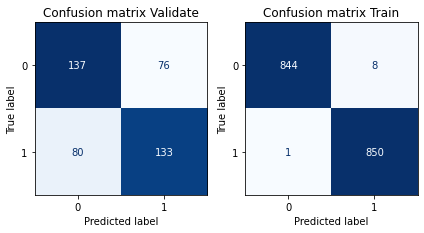

RandomForestClassifier(max_depth=12, max_features=15, n_estimators=250,
                       random_state=8)


In [16]:
for _,row in rf_param[rf_param['param']=='max_features'].iterrows():
    evm.eval_model(RandomForestClassifier(random_state=8,n_estimators=nestimator,max_depth=maxdepth,min_samples_leaf=minsamplesleaf,max_features = int(row.value)) ,x_train,y_train,x_val,y_val)

# Taking max_feature = 5, now using hyperopt to see if it can get better

In [17]:
maxfeatures=5

In [18]:
print('max_depth=',maxdepth,' max_features=',maxfeatures, ' min_samples_leaf=',minsamplesleaf,' n_estimators=',nestimator)

max_depth= 12  max_features= 5  min_samples_leaf= 1  n_estimators= 250


In [19]:
space = {
    'max_depth': hp.choice('max_depth',range(1,100,1)),
    'max_features': hp.choice('max_features',range(1,15,1)),
    'min_samples_leaf': hp.choice('min_samples_leaf',range(1,14,1)),
    'n_estimators':  hp.choice('n_estimators',range(10,500,1))
}
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x2841af0e970>,
 'max_features': <hyperopt.pyll.base.Apply at 0x2841e3552e0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x2841e355670>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x2841e3559d0>}

In [20]:
def objective(space):
   rf = RandomForestClassifier(max_depth = space['max_depth'],max_features = space['max_features'],min_samples_leaf = space['min_samples_leaf'],n_estimators = space['n_estimators'])
   acc=cross_val_score(rf, x_train,y_train,cv=50, scoring='roc_auc').mean()
   return{'loss': 1-acc, 'status': STATUS_OK }
best = fmin(
   fn=objective,  
   space=space,      
   algo=tpe.suggest,      
   max_evals=5
)

100%|███████████████████████████████████████████████████| 5/5 [04:33<00:00, 54.75s/trial, best loss: 0.305755478662053]


In [21]:
best

{'max_depth': 64,
 'max_features': 7,
 'min_samples_leaf': 0,
 'n_estimators': 353}

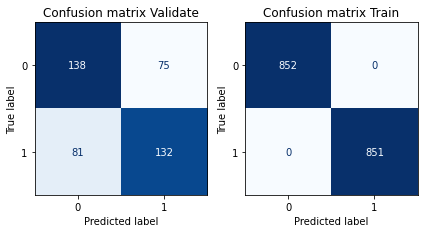

RandomForestClassifier(max_depth=64, max_features=7, n_estimators=353,
                       random_state=8)


(RandomForestClassifier(max_depth=64, max_features=7, n_estimators=353,
                        random_state=8),
 1.0,
 0.7024730542881703)

In [51]:
rf_dowmsample_mod1 = RandomForestClassifier(random_state=8,n_estimators = 353, max_depth = 64, max_features = 7)
evm.eval_model(rf_dowmsample_mod1,x_train,y_train,x_val,y_val)

(0.6919686857593423,
 0.6191369606003753,
 0.593186372745491,
 0.6379310344827587,
 0.5543071161048689,
 0.6191369606003753)

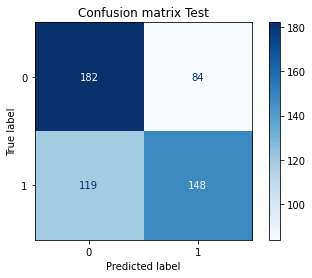

In [52]:
evm.get_performance(rf_dowmsample_mod1, x_test, y_test, "Test", True)

In [24]:
def objective(space):
   rf = RandomForestClassifier(max_depth = space['max_depth'],max_features = space['max_features'],min_samples_leaf = space['min_samples_leaf'],n_estimators = space['n_estimators'])
   acc=cross_val_score(rf, x_train,y_train,cv=50).mean()
   return{'loss': 1-acc, 'status': STATUS_OK }
best = fmin(
   fn=objective,  
   space=space,      
   algo=tpe.suggest,      
   max_evals=5
)

100%|█████████████████████████████████████████████████| 5/5 [04:08<00:00, 49.69s/trial, best loss: 0.35882352941176465]


In [25]:
best

{'max_depth': 26,
 'max_features': 10,
 'min_samples_leaf': 2,
 'n_estimators': 349}

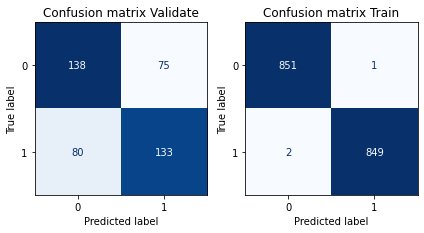

RandomForestClassifier(max_depth=26, max_features=10, min_samples_leaf=2,
                       n_estimators=349, random_state=8)


(RandomForestClassifier(max_depth=26, max_features=10, min_samples_leaf=2,
                        n_estimators=349, random_state=8),
 0.9999958623657338,
 0.701359959443673)

In [43]:
rf_dowmsample_mod2 = RandomForestClassifier(random_state=8,n_estimators = 349, max_depth = 26, max_features = 10, min_samples_leaf = 2)
evm.eval_model(rf_dowmsample_mod2,x_train,y_train,x_val,y_val)

(0.693714623637746,
 0.6210131332082551,
 0.5992063492063492,
 0.6371308016877637,
 0.5655430711610487,
 0.6210131332082551)

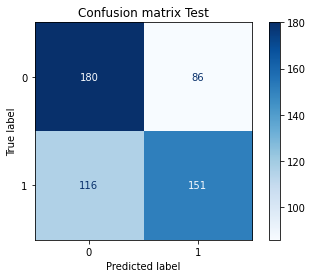

In [50]:
evm.get_performance(rf_dowmsample_mod2, x_test, y_test, "Test", True)

# Within the search parameter found above by hit and trial

In [27]:
print('max_depth=',maxdepth,' max_features=',maxfeatures, ' min_samples_leaf=',minsamplesleaf,' n_estimators=',nestimator)

max_depth= 12  max_features= 5  min_samples_leaf= 1  n_estimators= 250


In [28]:
space = {
    'max_depth': hp.choice('max_depth',range(2,15,1)),
    'max_features': hp.choice('max_features',range(1,10,1)),
    'min_samples_leaf': hp.choice('min_samples_leaf',range(1,10,1)),
    'n_estimators':  hp.choice('n_estimators',range(10,300,1))
}
space

{'max_depth': <hyperopt.pyll.base.Apply at 0x2841ada09a0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x2841af657c0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x2841af65340>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x2841af65490>}

In [29]:
def objective(space):
   rf = RandomForestClassifier(max_depth = space['max_depth'],max_features = space['max_features'],min_samples_leaf = space['min_samples_leaf'],n_estimators = space['n_estimators'])
   acc=cross_val_score(rf, x_train,y_train,cv=50).mean()
   return{'loss': 1-acc, 'status': STATUS_OK }
best = fmin(
   fn=objective,  
   space=space,      
   algo=tpe.suggest,      
   max_evals=5
)
best

100%|███████████████████████████████████████████████████| 5/5 [01:16<00:00, 15.28s/trial, best loss: 0.349983193277311]


{'max_depth': 8, 'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 265}

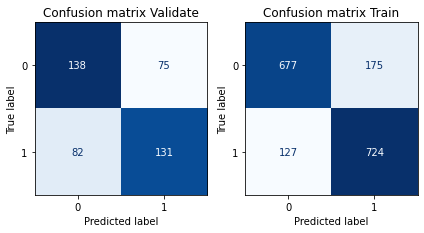

RandomForestClassifier(max_depth=8, max_features=3, min_samples_leaf=3,
                       n_estimators=265, random_state=8)


(RandomForestClassifier(max_depth=8, max_features=3, min_samples_leaf=3,
                        n_estimators=265, random_state=8),
 0.9197298952351003,
 0.7046220987899227)

In [32]:
rf_dowmsample_mod3 = RandomForestClassifier(random_state=8,n_estimators = best['n_estimators'], max_depth = best['max_depth'], max_features = best['max_features'], min_samples_leaf = best['min_samples_leaf'])
evm.eval_model(rf_dowmsample_mod3,x_train,y_train,x_val,y_val)

(0.6893920193742783,
 0.6097560975609756,
 0.5905511811023623,
 0.6224066390041494,
 0.5617977528089888,
 0.6097560975609756)

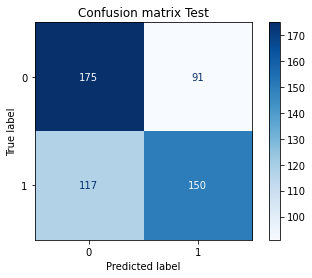

In [49]:
evm.get_performance(rf_dowmsample_mod3, x_test, y_test, "Test", True)

# Predict for DownSample Data

In [33]:
def read_and_split_data(file):
    df = pd.read_csv(file)
    df_cleaned = df.copy()
    print('Before Data Clean')
    for cols in df_cleaned.columns:
        chk_rows = df_cleaned[df_cleaned[cols]<0].shape[0]
        if chk_rows > 0 :
            print(f'Column Name {cols},\tRows with Negative Value {chk_rows},\tPercentage {chk_rows/len(df)*100}')
    df_cleaned[ df_cleaned<0 ] = 0
    df_cleaned.loc[df_cleaned['3P Made'] <= 0, ['3P Made', '3PA', 'CALC3P%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FGM'] <= 0, ['FGM', 'FGA', 'CALCFG%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FTM'] <= 0, ['FTM', 'FTA', 'CALCFT%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['3P Made'] > df_cleaned['3PA'], ['3P Made' , '3PA', 'CALC3P%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FGM'] > df_cleaned['FGA'], ['FGM', 'FGA', 'CALCFG%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['FTM'] > df_cleaned['FTA'], ['FTM', 'FTA', 'CALCFT%']] = 0, 0, 0
    df_cleaned.loc[df_cleaned['3P Made'] > 0, ['CALC3P%']] = df_cleaned['3P Made']/df_cleaned['3PA']*100
    df_cleaned.loc[df_cleaned['FGM'] > 0, ['CALCFG%']] =df_cleaned['FGM']/df_cleaned['FGA']*100
    df_cleaned.loc[df_cleaned['FTM'] > 0, ['CALCFT%']] = df_cleaned['FTM']/df_cleaned['FTA']*100
    print(df_cleaned.head(5))
    print('After Data Clean')
    for cols in df_cleaned.columns:
        chk_rows = df_cleaned[df_cleaned[cols]<0].shape[0]
        if chk_rows > 0 :
            print(f'Column Name {cols},\tRows with Negative Value {chk_rows},\tPercentage {chk_rows/len(df)*100}')
    x = df_cleaned.drop(['3P%','FT%','FG%','Id_old','Id'],axis=1)
    print(df_cleaned.columns)
    return x , df_cleaned

In [34]:
x, df_cleaned =read_and_split_data('../data/raw/test.csv')

Before Data Clean
Column Name 3P Made,	Rows with Negative Value 775,	Percentage 20.400105290866016
Column Name 3PA,	Rows with Negative Value 773,	Percentage 20.34745985785733
Column Name 3P%,	Rows with Negative Value 435,	Percentage 11.450381679389313
Column Name BLK,	Rows with Negative Value 456,	Percentage 12.003158725980521
   Id_old  Id  GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  ...  OREB  DREB  \
0       1   0  56   9.1   4.0  1.6   3.7  43.7      0.1  0.3  ...   1.2   0.8   
1    8194   1  43  19.3  10.1  3.7   8.1  46.0      0.6  1.7  ...   0.5   0.9   
2       3   2  82  33.9  11.3  4.9  10.6  45.6      0.5  1.9  ...   1.3   3.3   
3    8196   3  86  44.7  18.8  6.8  15.9  42.9      0.5  1.8  ...   1.5   3.2   
4    8197   4  58  12.3   4.7  1.6   4.0  40.0      0.5  1.7  ...   0.2   0.6   

   REB  AST  STL  BLK  TOV    CALC3P%    CALCFG%    CALCFT%  
0  1.7  0.4  0.2  0.3  0.8  33.333333  43.243243  58.333333  
1  1.5  3.5  0.6  0.0  1.8  35.294118  45.679012  72.000000 

In [44]:
y_downsample_pred_proba=rf_dowmsample_mod2.predict_proba(x)
y_downsample_pred=rf_dowmsample_mod2.predict(x)

In [45]:
print(np.unique(y_downsample_pred_proba,return_counts=True))
print(np.unique(y_downsample_pred,return_counts=True))

(array([0.04927002, 0.05871197, 0.05902579, ..., 0.94097421, 0.94128803,
       0.95072998]), array([1, 1, 1, ..., 1, 1, 1], dtype=int64))
(array([0, 1], dtype=int64), array([2225, 1574], dtype=int64))


In [46]:
print(rf_dowmsample_mod2.classes_)

[0 1]


In [47]:
df_cleaned_downsample_result = df_cleaned.copy()
df_cleaned_downsample_result['TARGET_5Yrs'] = y_downsample_pred_proba[:,0]
print(df_cleaned_downsample_result['TARGET_5Yrs'].round().value_counts())

1.0    2225
0.0    1574
Name: TARGET_5Yrs, dtype: int64


In [48]:
df_cleaned_downsample_result.to_csv('../data/processed/TestResult_RF_DownSampleUpdated_Result.csv',index=False,columns=['Id', 'TARGET_5Yrs'])